<a href="https://colab.research.google.com/github/engineerchacon/Maestria-en-Inteligencia-Artificial-y-Analitica-de-Datos-Colab-Files/blob/main/Pr%C3%A1ctica_20_Ejercicios_con_EDA_1_Armando_Chac%C3%B3n_Terrazas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios con EDA 1
---
Materia: Programación para Analítica Descriptiva y Predictiva

Unidad 02: Análisis Descriptivo de los Datos

Maestría en Inteligencia Artificial y Analítica de Datos

Universidad Autónoma de Ciudad Juárez

Armando Chacón Terrazas

---


# **Instrucciones:**
Descripción del conjunto de datos:


Utiliza el conjunto de datos "Air Quality" disponible al final de esta practica. Este conjunto contiene datos horarios de sensores de calidad del aire, incluyendo niveles de CO, NOx, y otros contaminantes. El conjunto de datos tiene valores faltantes y columnas categóricas (por ejemplo, el día de la semana).

# **Instrucciones para los estudiantes:**

Descargar el archivo AirQuality.csv desde el enlace proporcionado.

Realizar un EDA completo, incluyendo:

Descripción de los datos (medias, medianas, desviaciones estándar, etc.).

Histogramas para las columnas numéricas.

De la columna Time obten el día de la Semana y realiza una gráfica de barras.

Boxplots para identificar outliers en las columnas numéricas.

Matriz de correlación y mapa de calor.

Pairplot para visualizar relaciones entre variables numéricas.

Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.

Identificar y tratar los datos faltantes utilizando técnicas como imputación por media, mediana o moda, o eliminación de filas/columnas según sea apropiado.

Repetir el EDA después del tratamiento de datos faltantes y comparar los resultados.

Responde a estas preguntas y sube tus conclusiones a un PDF (se verificará el uso de IA)
Análisis Exploratorio de Datos (EDA):

¿Qué patrones o tendencias observaste en los histogramas y gráficas de densidad (PDF)? ¿Alguna variable parece seguir una distribución normal?

¿Qué información útil obtuviste de la gráfica de barras para el día de la semana?

¿Identificaste outliers en los boxplots? ¿Cómo podrían afectar estos outliers al modelo de regresión lineal?

Pruebas de Normalidad:

¿Qué conclusiones obtuviste de las pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov)? ¿Qué variables no siguen una distribución normal?

¿Cómo interpretas los QQplots? ¿Qué variables se desvían significativamente de la normalidad?

Tratamiento de Datos Faltantes:

¿Qué estrategia utilizaste para manejar los datos faltantes? ¿Por qué elegiste esa estrategia?

¿Cómo cambió el EDA después de la imputación de datos? ¿Observaste diferencias significativas en las distribuciones de las variables?

Matriz de Correlación y Pairplot:

¿Qué relaciones lineales identificaste en la matriz de correlación y el pairplot? ¿Alguna variable tiene una correlación fuerte con la variable objetivo?

¿Cómo podrías utilizar esta información para seleccionar características (features) en un modelo de regresión lineal?

No olvides enviar tu enlace de github, el .ipynb y el pdf respondiendo a las preguntas derivadas del EDA

In [19]:
# Montar Google Drive para acceder al archivo
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Limpieza de los datos de la tabla **

Al abrir el archivo me di cuenta que los datos no se encontraban listos para ser analizados ya que las columnas de los datos se encontraban todos en A pero separados por un ; esto hace que tengamos que organizar la informacion primero.

In [20]:
# Importamos la librería
import pandas as pd

# Ruta del archivo
ruta_archivo = '/content/drive/MyDrive/Unidad02/AirQuality.csv'

# Abrimos y leemos todo el archivo como texto
datos_texto = ''
with open(ruta_archivo, 'r', encoding='utf-8') as archivo:
    datos_texto = archivo.read()

# Separamos el contenido en líneas usando el salto de línea
lineas = datos_texto.strip().split('\n')

# Creamos una lista vacía para guardar los datos procesados
datos_procesados = []

# Procesamos cada línea para organizar los datos
for linea in lineas:
    # Si la línea termina con ';', la quitamos
    if linea.endswith(';'):
        linea = linea[:-1]

    # Separamos cada valor usando ';' como separador
    valores = []
    partes = linea.split(';')

    # Revisamos cada parte: si está vacía, ponemos 'Sin Dato'
    for parte in partes:
        valor_limpio = parte.strip()  # Quitamos espacios extras
        if valor_limpio == '':
            valores.append('Sin Dato')  # Ponemos 'Sin Dato' cuando no hay valor
        else:
            valores.append(valor_limpio)  # Ponemos el valor limpio

    # Si faltan columnas (menos de 16), llenamos con 'Sin Dato'
    while len(valores) < 16:
        valores.append('Sin Dato')

    # Si hay más de 16 columnas, cortamos para que sean solo 16
    if len(valores) > 16:
        valores = valores[:16]

    # Añadimos la lista de valores procesados a datos_procesados
    datos_procesados.append(valores)

# La primera fila tiene los nombres de las columnas
nombres_columnas = datos_procesados[0]

# Creamos la tabla (DataFrame) con los datos a partir de la segunda fila
tabla = pd.DataFrame(datos_procesados[1:], columns=nombres_columnas)

# Quitamos todas las comas que puedan estar dentro de las celdas
tabla = tabla.replace(',', '', regex=True)

# Si la última columna se llama 'Sin Dato', la eliminamos de la tabla
if tabla.columns[-1] == 'Sin Dato':
    tabla = tabla.drop(columns=['Sin Dato'])

# Convertir la columna 'Date' a tipo fecha
encontrada_fecha = False
if 'Date' in tabla.columns:
    tabla['Date'] = pd.to_datetime(tabla['Date'], errors='coerce')
    encontrada_fecha = True

# Convertir la columna 'Time' a tipo hora
encontrada_hora = False
if 'Time' in tabla.columns:
    try:
        tabla['Time'] = pd.to_datetime(tabla['Time'], format='%H.%M.%S', errors='coerce').dt.time
    except:
        tabla['Time'] = pd.to_datetime(tabla['Time'], errors='coerce').dt.time
    encontrada_hora = True

# Convertir las demás columnas a numérico
for columna in tabla.columns:
    if columna not in ['Date', 'Time']:
        tabla[columna] = pd.to_numeric(tabla[columna], errors='coerce')

# Mostramos información básica de la tabla y sus primeras filas
print("Información de la tabla:")
print('\n')
print('El tipo de dato de cada columna es: ')
print(tabla.info())
print('\n')
# Mostramos los tipos de datos finales de cada columna
print("\nTipos de datos de cada columna:")
print(tabla.dtypes)
print('\n')
print(f"Dimensiones: {tabla.shape}")           # Cuántas filas y columnas tiene
print('\n')
print(f"Columnas: {tabla.columns.tolist()}")   # Nombres de las columnas
print('\n')
print("\nPrimeras 5 filas:")
print(tabla.head())                             # Las primeras 5 filas para ver los datos


Información de la tabla:


El tipo de dato de cada columna es: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3597 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH      

# **Descripción de los datos (medias, medianas, desviaciones estándar, etc.).**

**Nota:** El método tabla.describe() en pandas solo muestra por defecto
las columnas numéricas y de fecha (datetime64), pero no incluye columnas de tipo hora.

**count** Número de valores no nulos en cada columna.

**mean** Media aritmética de cada variable numérica.

**std** Desviación estándar, que mide la dispersión de los datos.

**min** Valor mínimo registrado.

**25%** Primer cuartil (Q1), indica el 25% inferior de los datos.

**50%** Mediana (Q2), punto central de los datos.

**75%** Tercer cuartil (Q3), indica el 75% inferior de los datos.

**max** Valor máximo registrado.


In [21]:
# Estadísticas básicas: media, desviación estándar, cuartiles, etc.
print('Estadísticas descriptivas:')
print(tabla.describe())
print('\n')
print('Medianas por columna:')
print(tabla.drop(columns=['Time']).median())
print('\n')
print('Desviaciones estándar por columna:')
print(tabla.drop(columns=['Time']).std())

Estadísticas descriptivas:
                                Date       CO(GT)  PT08.S1(CO)     NMHC(GT)  \
count                           3597  9357.000000  9357.000000  9357.000000   
mean   2004-09-25 10:18:30.925771648   -36.996687  1048.990061  -159.090093   
min              2004-01-04 00:00:00 -2000.000000  -200.000000  -200.000000   
25%              2004-05-05 00:00:00     4.000000   921.000000  -200.000000   
50%              2004-09-06 00:00:00    14.000000  1053.000000  -200.000000   
75%              2005-01-03 00:00:00    25.000000  1221.000000  -200.000000   
max              2005-12-03 00:00:00   119.000000  2040.000000  1189.000000   
std                              NaN   211.793927   329.832710   139.789093   

          C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  \
count  9357.000000    9357.000000  9357.000000   9357.000000  9357.000000   
mean     18.656834     894.595276   168.616971    794.990168    58.148873   
min   -2000.000000    -200.000

# **Histogramas para las columnas numéricas.**

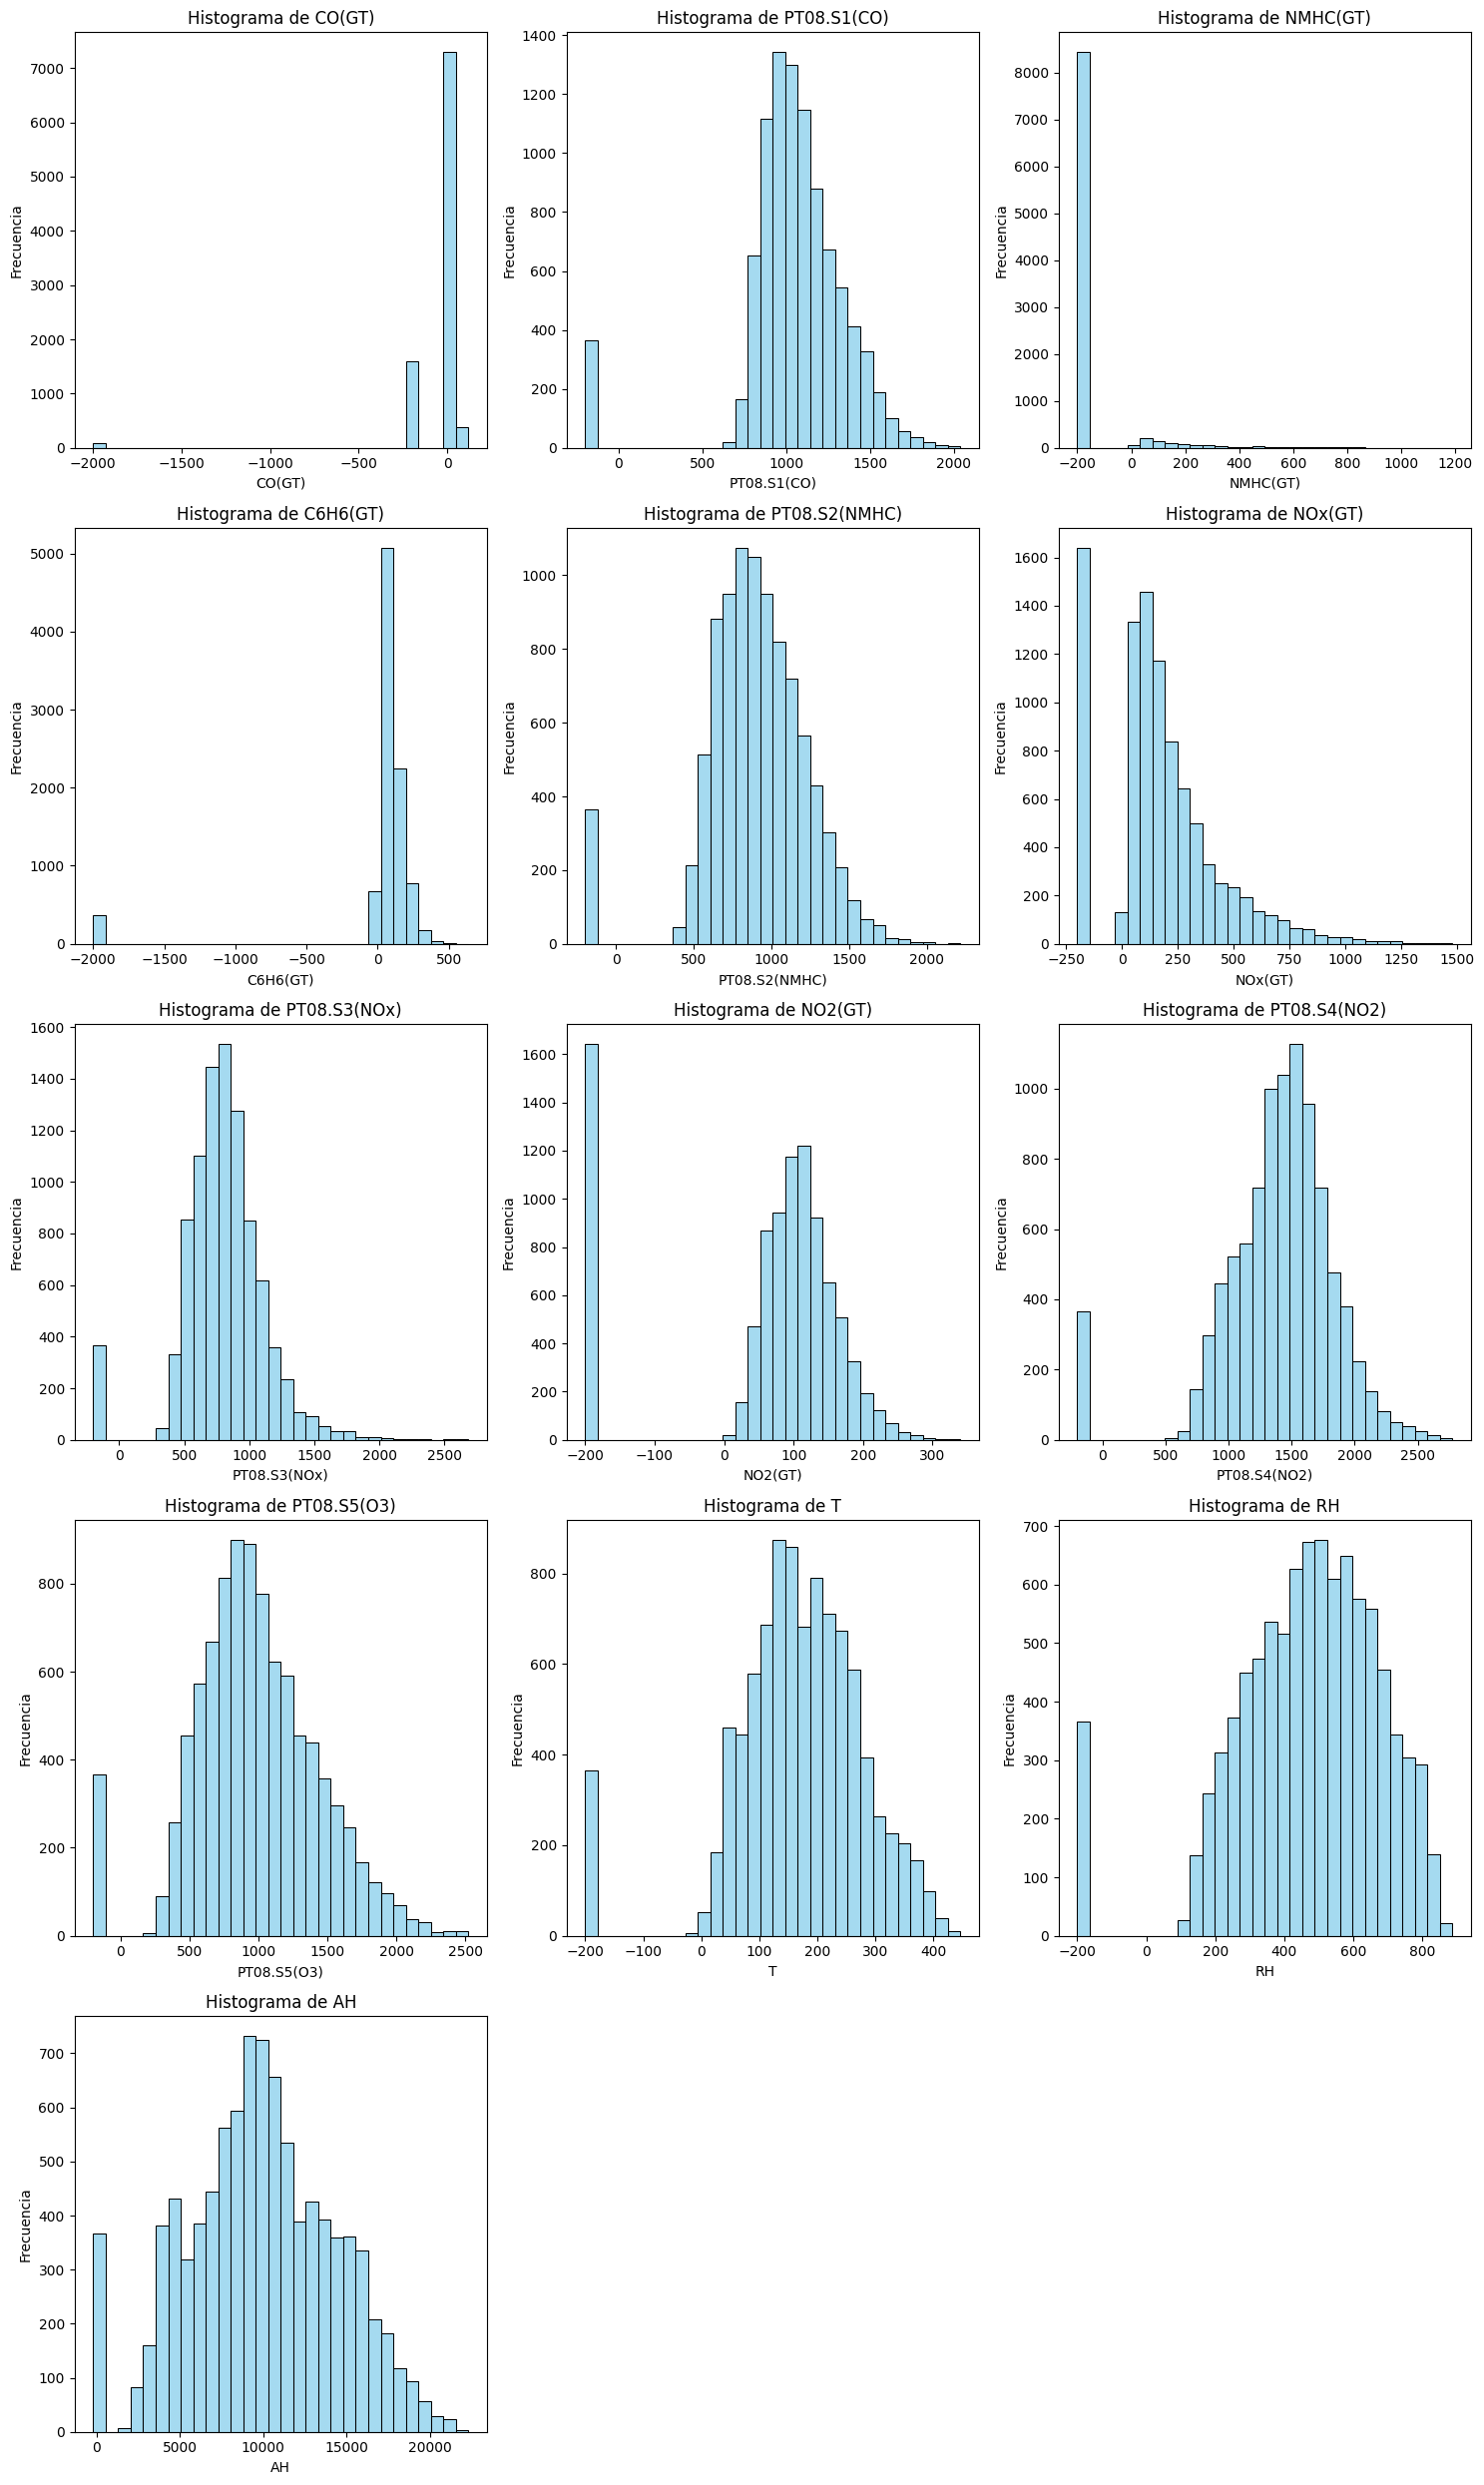

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Selecciona solo las columnas numéricas del DataFrame
datos_numericos = tabla.select_dtypes(include=[np.number])

total_columnas = len(datos_numericos.columns)
filas = int(np.ceil(total_columnas / 3))  # 3 columnas por fila
plt.figure(figsize=(15, 5 * filas))

# Crea un histograma para cada columna numérica
for i, col in enumerate(datos_numericos.columns, 1):
    plt.subplot(filas, 3, i)
    sns.histplot(tabla[col], bins=30, color='skyblue', kde=False)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



# **De la columna Time obten el día de la Semana y realiza una gráfica de barras.**

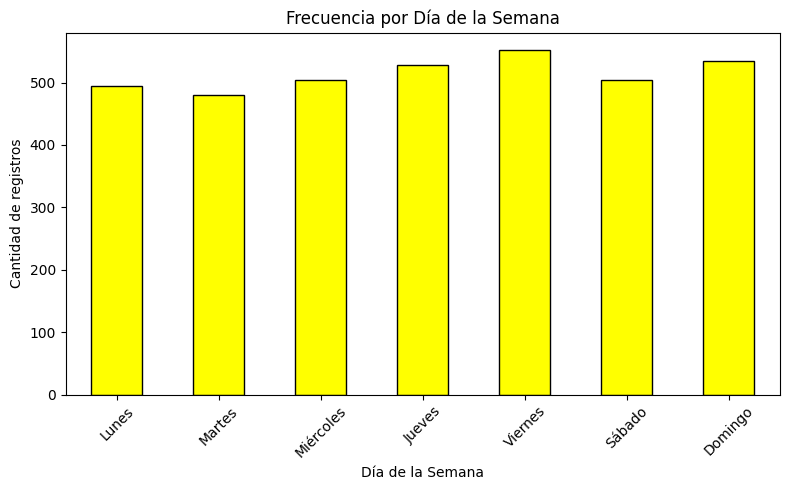

In [23]:
import matplotlib.pyplot as plt

# Extraer el nombre del día de la semana
dias_es = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
tabla['DiaSemana'] = tabla['Date'].dt.dayofweek.apply(lambda x: dias_es[int(x)] if pd.notnull(x) else 'Sin Dato')

# Contar los datos que hay por cada día de la semana
conteo_dias = tabla['DiaSemana'].value_counts().reindex(dias_es)

# Graficar
plt.figure(figsize=(8,5))
conteo_dias.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Frecuencia por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Boxplots para identificar outliers en las columnas numéricas.**

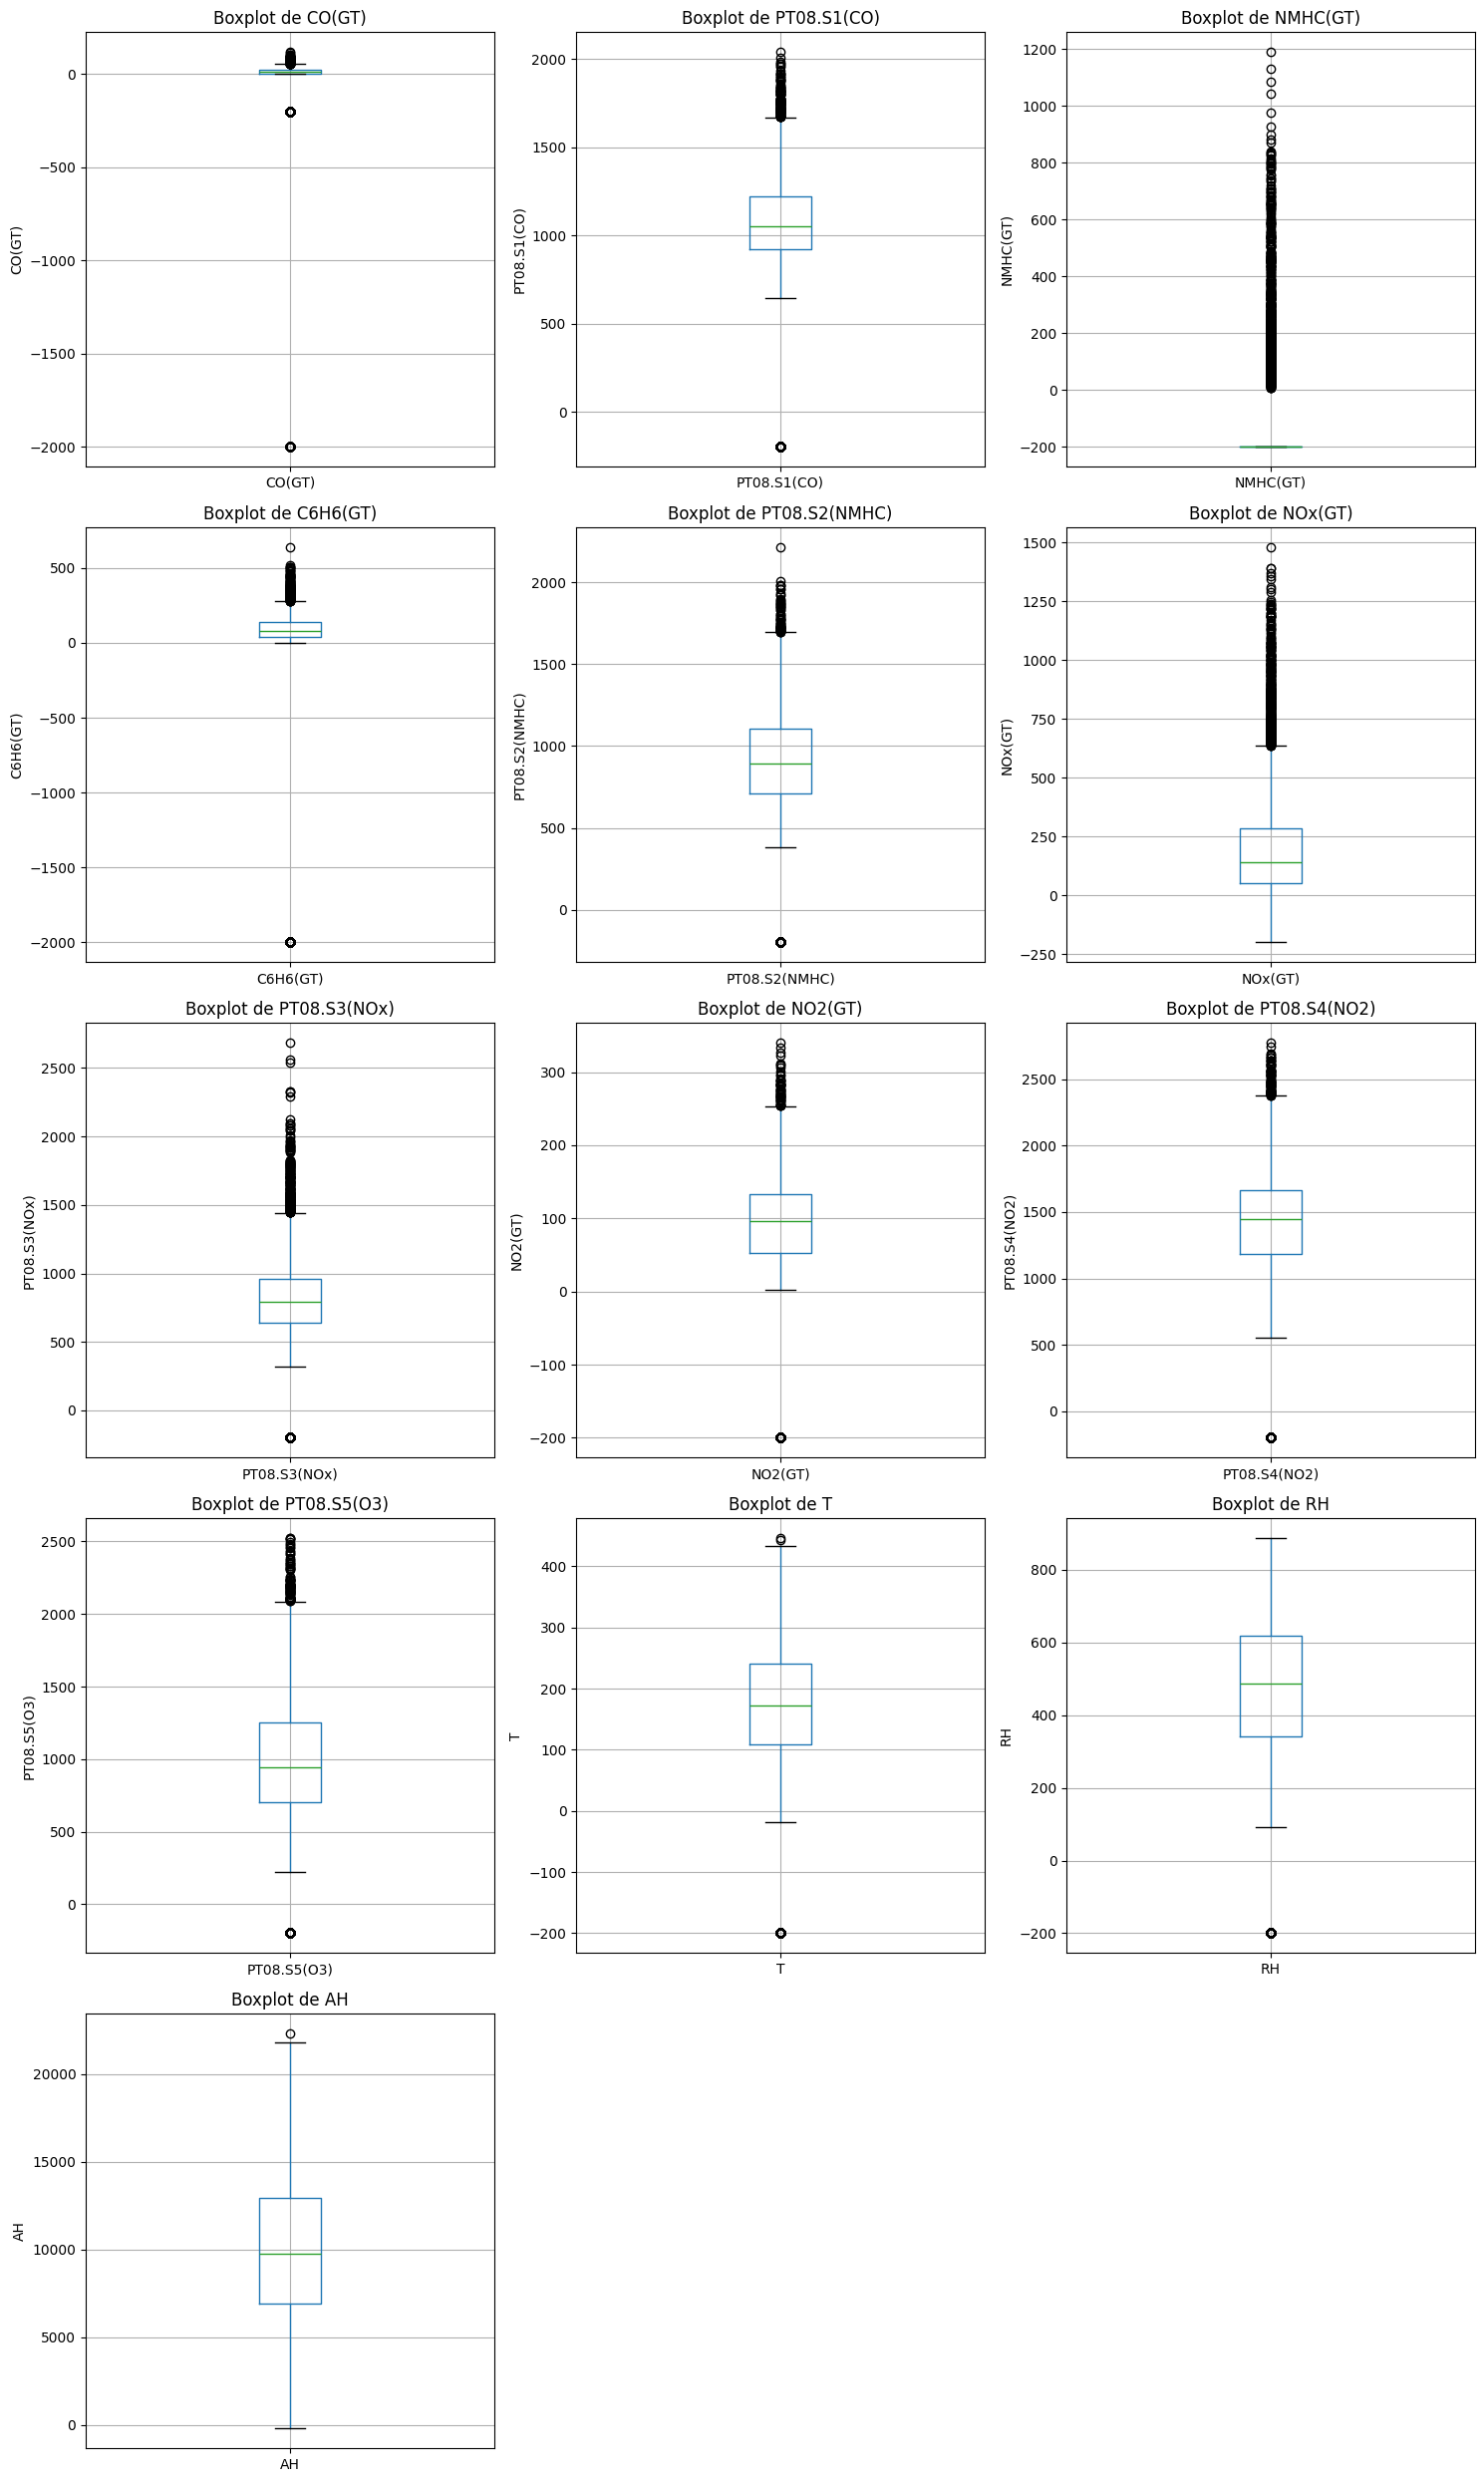

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar solo las columnas numéricas
datos_numericos = tabla.select_dtypes(include=[np.number])

# Configurar el tamaño de la figura general
num_columnas = len(datos_numericos.columns)
filas = int(np.ceil(num_columnas / 3))  # 3 columnas por fila
plt.figure(figsize=(15, 5 * filas))

# Crea un boxplot para cada columna numérica
for i, col in enumerate(datos_numericos.columns, 1):
    plt.subplot(filas, 3, i)
    tabla.boxplot(column=col)
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


# **Matriz de correlación y mapa de calor**

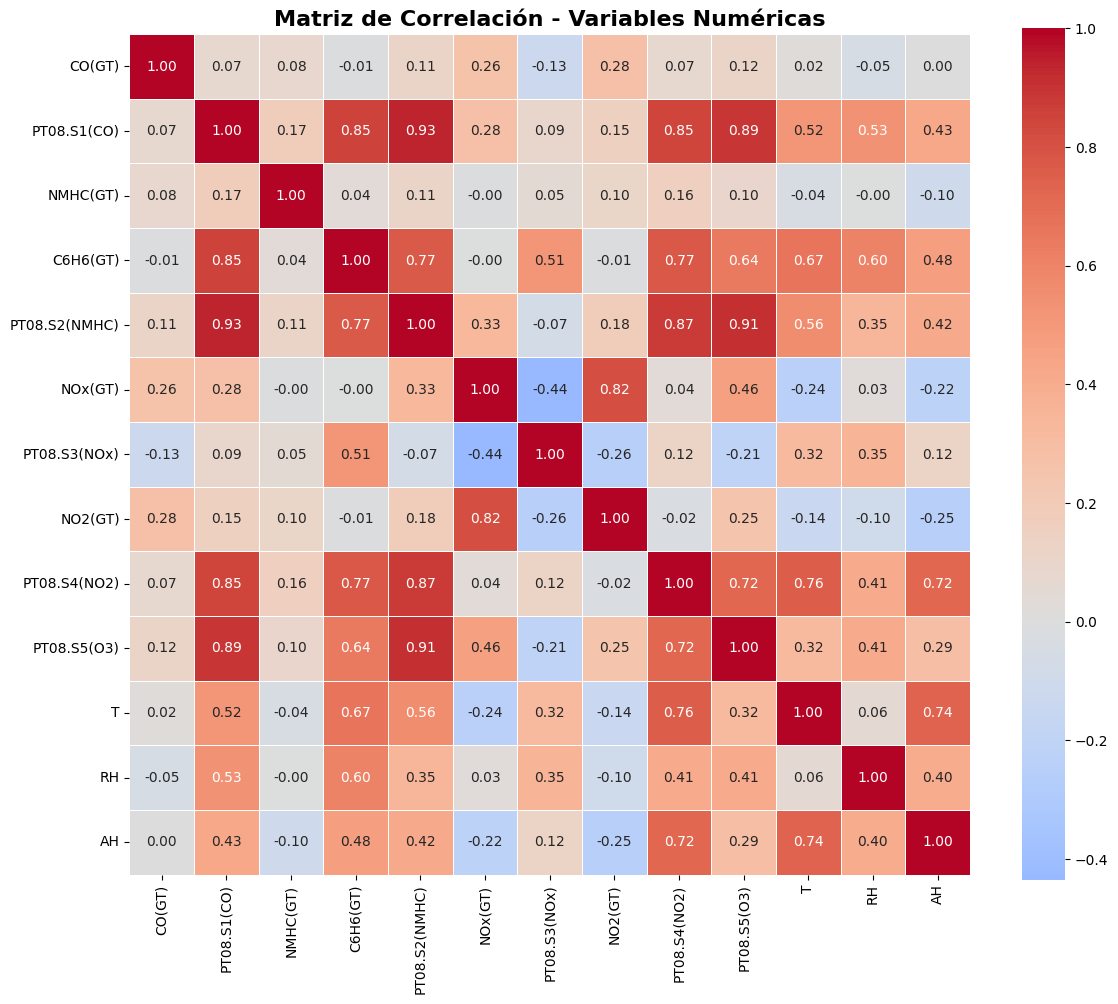

Matriz de correlación:
                 CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.072755  0.082723 -0.007046       0.109069   
PT08.S1(CO)    0.072755     1.000000  0.170007  0.852687       0.933102   
NMHC(GT)       0.082723     0.170007  1.000000  0.037323       0.110104   
C6H6(GT)      -0.007046     0.852687  0.037323  1.000000       0.767433   
PT08.S2(NMHC)  0.109069     0.933102  0.110104  0.767433       1.000000   
NOx(GT)        0.264291     0.277993 -0.004427 -0.001174       0.331272   
PT08.S3(NOx)  -0.132442     0.087019  0.048821  0.512193      -0.073667   
NO2(GT)        0.278905     0.154030  0.103307 -0.010992       0.176488   
PT08.S4(NO2)   0.070430     0.845149  0.162680  0.774673       0.874782   
PT08.S5(O3)    0.117769     0.892434  0.101185  0.641334       0.909905   
T              0.022497     0.521365 -0.042066  0.667630       0.560086   
RH            -0.053690     0.531915 -0.002551  0.601994       0.346003   
AH

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seleccionar solo las columnas numéricas del DataFrame
datos_numericos = tabla.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
matriz_correlacion = datos_numericos.corr()

# Crear el mapa de calor (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion,
            annot=True,           # Mostrar los valores de correlación
            cmap='coolwarm',      # Colores azul-rojo para correlaciones neg-pos
            fmt='.2f',           # Formato de dos decimales
            linewidths=0.5,      # Líneas entre celdas
            center=0,            # Centrar la escala en 0
            square=True)         # Hacer cuadrados las celdas

plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Opcional: Mostrar la matriz de correlación en formato texto
print("Matriz de correlación:")
print(matriz_correlacion)


Interpretación del mapa de calor:

Valores cercanos a 1: Correlación positiva fuerte

Valores cercanos a -1: Correlación negativa fuerte

Valores cercanos a 0: Sin correlación lineal

# **Prueba de normalidad **
# **Shapiro-Wilk**

Evalúa si los datos de una columna siguen una distribución normal (campana de Gauss).

La hipótesis nula es que los datos provienen de una distribución normal.

Si el p-valor es menor a 0.05, se rechaza la normalidad.

Es muy sensible al tamaño de la muestra: con muestras grandes (más de 50 o 100 datos), puede detectar pequeñas desviaciones y rechazar la normalidad aunque los datos sean "prácticamente normales".

Con muestras muy pequeñas (menos de 30), puede no detectar desviaciones importantes y aceptar la normalidad incorrectamente.

No es especialmente sensible a los valores atípicos.

Nota: Me genera un warning por el tamño de la muestra esta prueba Shapiro-Wilk puede no ser confiable si la muestra tiene más de 5000 datos (N > 5000).

In [26]:
from scipy.stats import shapiro

columnas_numericas = tabla.select_dtypes(include=['float64', 'int64']).columns

for nombre in columnas_numericas:
    datos = tabla[nombre].dropna()
    estadistico, pvalor = shapiro(datos)
    print(f"Shapiro-Wilk para {nombre}: estadístico={estadistico:.4f}, p-valor={pvalor:.4f}")
    # Si el p-valor < 0.05, los datos NO son normales


Shapiro-Wilk para CO(GT): estadístico=0.2894, p-valor=0.0000
Shapiro-Wilk para PT08.S1(CO): estadístico=0.8232, p-valor=0.0000
Shapiro-Wilk para NMHC(GT): estadístico=0.3307, p-valor=0.0000
Shapiro-Wilk para C6H6(GT): estadístico=0.3394, p-valor=0.0000
Shapiro-Wilk para PT08.S2(NMHC): estadístico=0.9311, p-valor=0.0000
Shapiro-Wilk para NOx(GT): estadístico=0.9237, p-valor=0.0000
Shapiro-Wilk para PT08.S3(NOx): estadístico=0.9250, p-valor=0.0000
Shapiro-Wilk para NO2(GT): estadístico=0.7774, p-valor=0.0000
Shapiro-Wilk para PT08.S4(NO2): estadístico=0.9024, p-valor=0.0000
Shapiro-Wilk para PT08.S5(O3): estadístico=0.9794, p-valor=0.0000
Shapiro-Wilk para T: estadístico=0.9293, p-valor=0.0000
Shapiro-Wilk para RH: estadístico=0.9396, p-valor=0.0000
Shapiro-Wilk para AH: estadístico=0.9917, p-valor=0.0000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9357.
  res = hypotest_fun_out(*samples, **kwds)


# **Anderson-Darling**

Evalúa si los datos siguen una distribución normal comparando la forma de la muestra con la normal teórica.

Da un estadístico y varios valores críticos para diferentes niveles de confianza.

Si el estadístico es mayor que el valor crítico para un nivel (por ejemplo, 5%), los datos no son normales a ese nivel.

Puede ser sensible a los valores atípicos.

Su interpretación depende de comparar el estadístico con los valores críticos, no solo del p-valor.

Menos utilizada en la práctica básica, pero útil para muestras medianas y grandes.

In [27]:
from scipy.stats import anderson

for nombre in columnas_numericas:
    datos = tabla[nombre].dropna()
    resultado = anderson(datos, dist='norm')
    print(f"Anderson-Darling para {nombre}: estadístico={resultado.statistic:.4f}")
    for nivel, critico in zip(resultado.significance_level, resultado.critical_values):
        print(f"  Nivel {nivel}% -> crítico={critico:.3f}")
    # Si el estadístico es mayor que el crítico, los datos NO son normales a ese nivel


Anderson-Darling para CO(GT): estadístico=1896.8758
  Nivel 15.0% -> crítico=0.576
  Nivel 10.0% -> crítico=0.656
  Nivel 5.0% -> crítico=0.787
  Nivel 2.5% -> crítico=0.918
  Nivel 1.0% -> crítico=1.092
Anderson-Darling para PT08.S1(CO): estadístico=355.4125
  Nivel 15.0% -> crítico=0.576
  Nivel 10.0% -> crítico=0.656
  Nivel 5.0% -> crítico=0.787
  Nivel 2.5% -> crítico=0.918
  Nivel 1.0% -> crítico=1.092
Anderson-Darling para NMHC(GT): estadístico=2820.9492
  Nivel 15.0% -> crítico=0.576
  Nivel 10.0% -> crítico=0.656
  Nivel 5.0% -> crítico=0.787
  Nivel 2.5% -> crítico=0.918
  Nivel 1.0% -> crítico=1.092
Anderson-Darling para C6H6(GT): estadístico=2272.5848
  Nivel 15.0% -> crítico=0.576
  Nivel 10.0% -> crítico=0.656
  Nivel 5.0% -> crítico=0.787
  Nivel 2.5% -> crítico=0.918
  Nivel 1.0% -> crítico=1.092
Anderson-Darling para PT08.S2(NMHC): estadístico=119.2082
  Nivel 15.0% -> crítico=0.576
  Nivel 10.0% -> crítico=0.656
  Nivel 5.0% -> crítico=0.787
  Nivel 2.5% -> crítico=0.

# **Prueba de Kolmogorov-Smirnov**

Compara la distribución de los datos con una normal teórica usando la media y desviación estándar de los datos.

La hipótesis nula es que los datos provienen de una distribución normal.

Si el p-valor es menor a 0.05, los datos no son normales.

Menos potente que Shapiro-Wilk para detectar desviaciones de la normalidad, especialmente en muestras pequeñas.

Puede ser demasiado conservadora (no detectar no-normalidad) si la muestra es pequeña.

Es importante estandarizar los datos antes de aplicar la prueba.

In [28]:
from scipy.stats import kstest

for nombre in columnas_numericas:
    datos = tabla[nombre].dropna()
    datos_estandarizados = (datos - datos.mean()) / datos.std()
    estadistico, pvalor = kstest(datos_estandarizados, 'norm')
    print(f"Kolmogorov-Smirnov para {nombre}: estadístico={estadistico:.4f}, p-valor={pvalor:.4f}")
    # Si el p-valor < 0.05, los datos NO son normales


Kolmogorov-Smirnov para CO(GT): estadístico=0.3913, p-valor=0.0000
Kolmogorov-Smirnov para PT08.S1(CO): estadístico=0.1488, p-valor=0.0000
Kolmogorov-Smirnov para NMHC(GT): estadístico=0.5174, p-valor=0.0000
Kolmogorov-Smirnov para C6H6(GT): estadístico=0.4447, p-valor=0.0000
Kolmogorov-Smirnov para PT08.S2(NMHC): estadístico=0.0808, p-valor=0.0000
Kolmogorov-Smirnov para NOx(GT): estadístico=0.0991, p-valor=0.0000
Kolmogorov-Smirnov para PT08.S3(NOx): estadístico=0.0806, p-valor=0.0000
Kolmogorov-Smirnov para NO2(GT): estadístico=0.2379, p-valor=0.0000
Kolmogorov-Smirnov para PT08.S4(NO2): estadístico=0.0867, p-valor=0.0000
Kolmogorov-Smirnov para PT08.S5(O3): estadístico=0.0434, p-valor=0.0000
Kolmogorov-Smirnov para T: estadístico=0.0603, p-valor=0.0000
Kolmogorov-Smirnov para RH: estadístico=0.0440, p-valor=0.0000
Kolmogorov-Smirnov para AH: estadístico=0.0272, p-valor=0.0000


# **QQ-plot (Gráfico de cuantiles)**

Es un gráfico que compara los cuantiles de tus datos con los de una distribución normal.

Si los puntos siguen la línea diagonal, los datos son normales.

Es una herramienta visual: la interpretación puede ser subjetiva, especialmente con muestras pequeñas.

No da un valor numérico para tomar decisiones, pero es muy útil para detectar asimetrías, colas largas o valores atípicos.

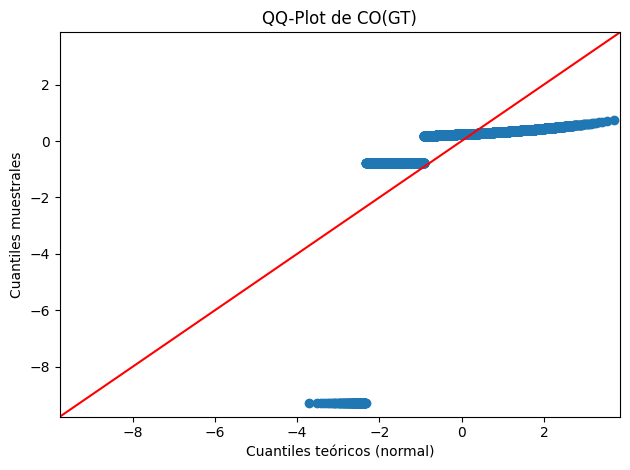

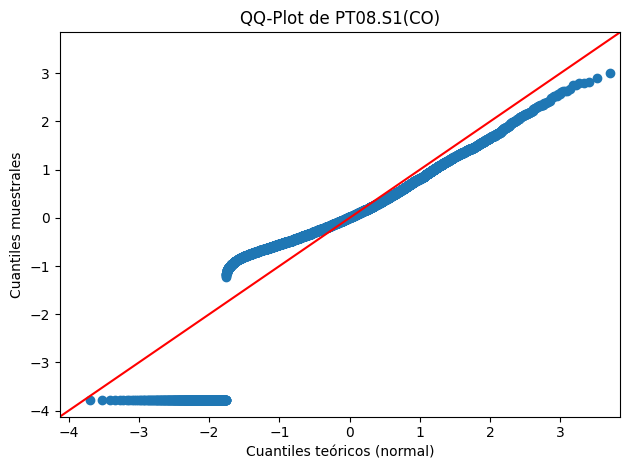

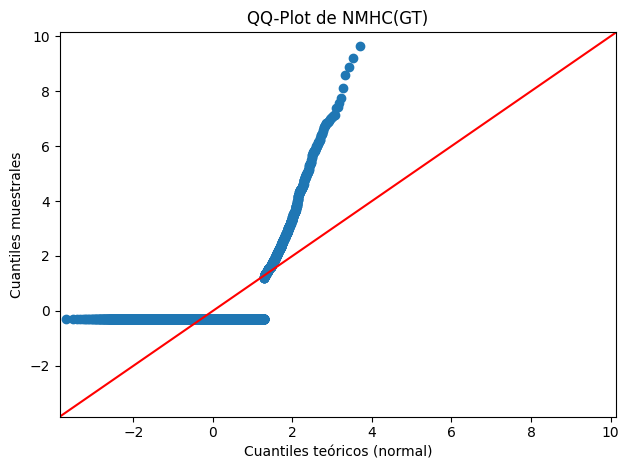

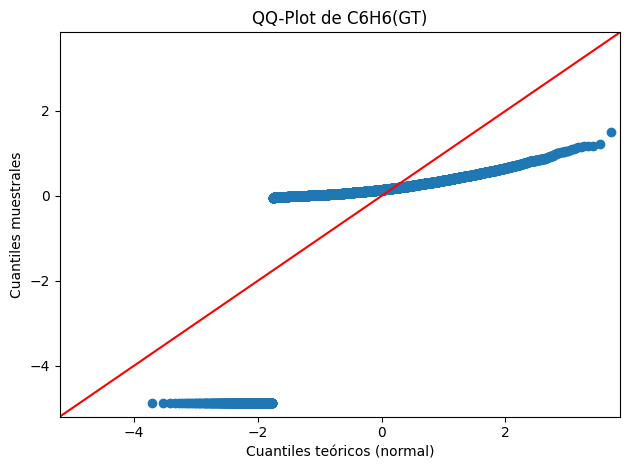

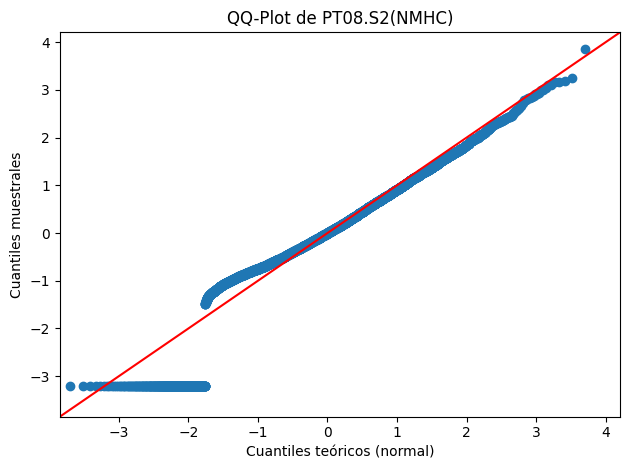

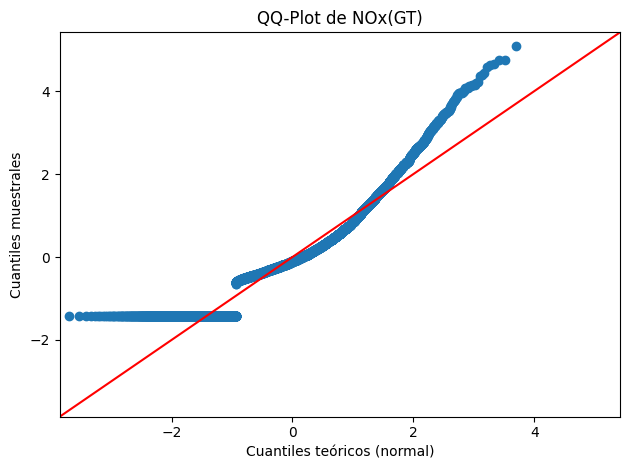

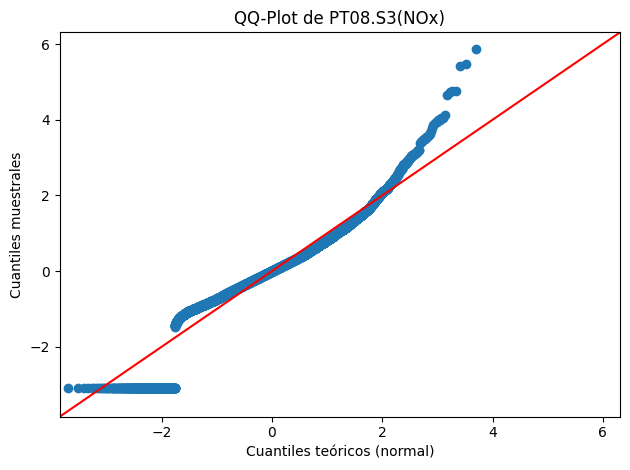

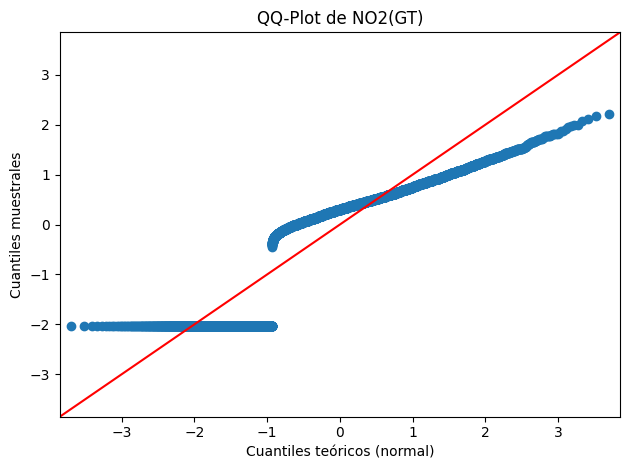

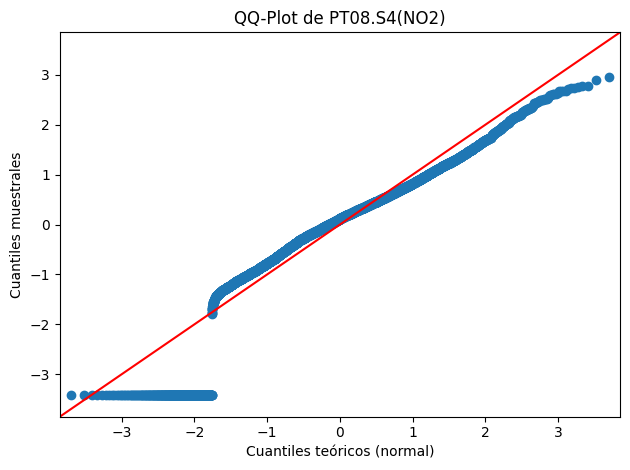

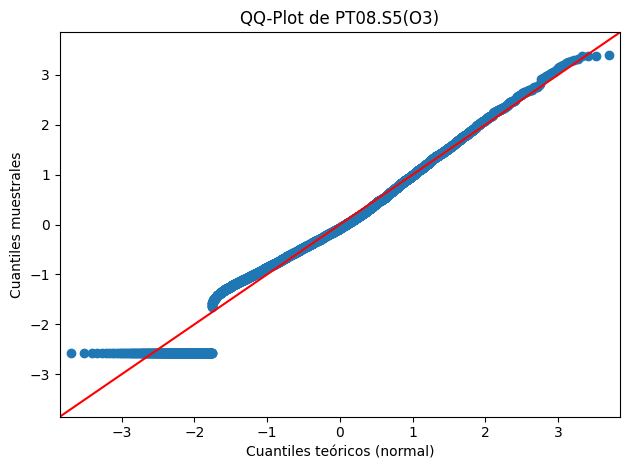

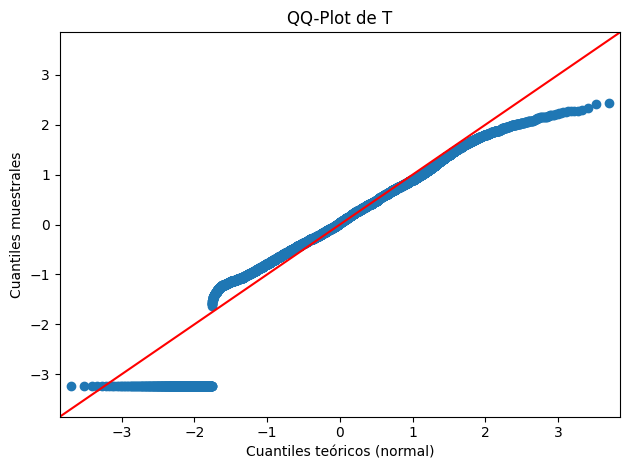

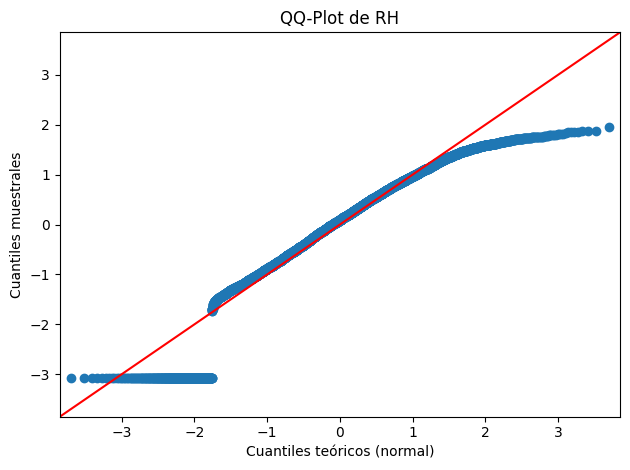

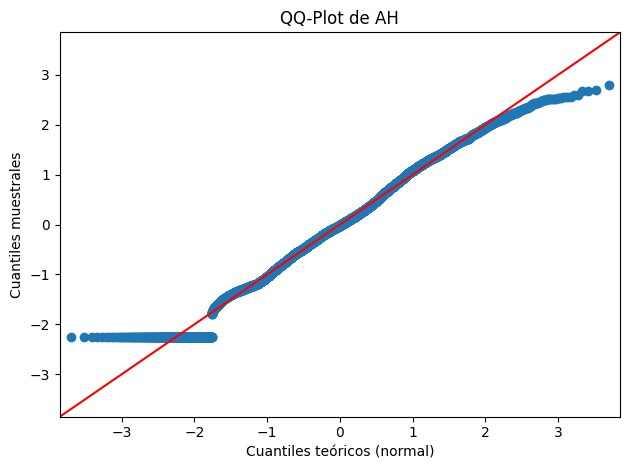

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

for nombre in columnas_numericas:
    datos = tabla[nombre].dropna()
    sm.qqplot(datos, line='45', fit=True)
    plt.title(f'QQ-Plot de {nombre}')
    plt.xlabel('Cuantiles teóricos (normal)')
    plt.ylabel('Cuantiles muestrales')
    plt.tight_layout()
    plt.show()

# **Datos Faltantes**

3.Identificar y tratar los datos faltantes utilizando técnicas como imputación por media, mediana o moda, o eliminación de filas/columnas según sea apropiado.

4.Repetir el EDA después del tratamiento de datos faltantes y comparar los resultados.

Nota: En mi caso ya había utilizado esta operación al principio para identificar si había datos faltantes, de los cuales no encontré más que lo que puede ser una columna ;; que probablemente tenía algunos valores al principio, pero como coincidieron los datos con la cantidad de columnas opte por eliminar en su totalidad esa columna pudiéndome equivocar, siendo esta la razón por la que no complete este ejercicio, otra cosa que tome en cuenta es que los datos no se cerraban en cada columna hasta que se encontraba un ; al principio y un ; al final, ya que por ejemplo el número 100 pudo ser en realidad 2 números 1 y 00 porque hacia un salto de columna y yo junte estos 2 números y se convirtieron en 100 porque me hacía más sentido que ; fuera quien indicara el principio y el final basándome en los nombres de las columnas en A y en las primeras 2 columnas que eran Date y Time.

In [30]:
# Contamos cuántos faltantes hay por columna
faltantes_por_col = tabla.isnull().sum()
print("Valores faltantes por columna:\n", faltantes_por_col)


Valores faltantes por columna:
 Date             5874
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
DiaSemana           0
dtype: int64
